In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = 6* np.random.rand(100,1) -3
y= 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
#quadratic equation used 

Text(0, 0.5, 'Y dataset')

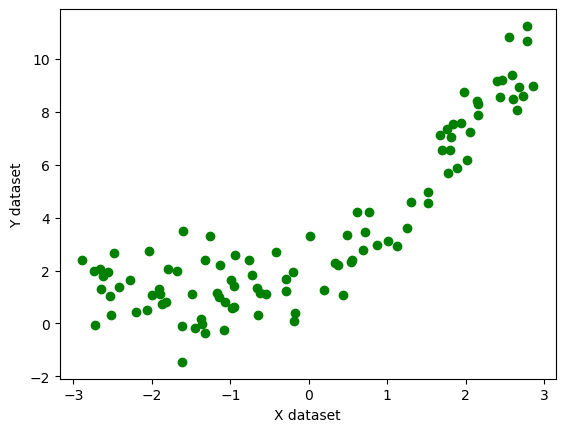

In [4]:
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
# lets implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [8]:
regression_1.fit(x_train,y_train)

LinearRegression()

In [9]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(x_test))
print(score)

0.6566095784612265


In [10]:
# visualization of this model

Text(0, 0.5, 'Y')

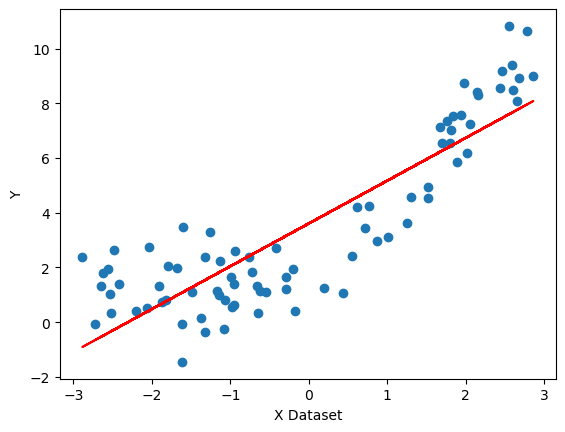

In [12]:
plt.plot(x_train,regression_1.predict(x_train),color="r")
plt.scatter(x_train,y_train)
plt.xlabel('X Dataset')
plt.ylabel('Y')

In [13]:
# polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [15]:
x_train_poly

array([[ 1.        , -2.56008482,  6.55403429],
       [ 1.        ,  2.65651066,  7.05704887],
       [ 1.        , -2.03121798,  4.12584649],
       [ 1.        , -2.52914815,  6.39659037],
       [ 1.        , -2.65437801,  7.0457226 ],
       [ 1.        , -0.19781295,  0.03912996],
       [ 1.        ,  0.55137924,  0.30401907],
       [ 1.        , -1.68186595,  2.82867309],
       [ 1.        ,  2.05500678,  4.22305286],
       [ 1.        , -0.66201221,  0.43826016],
       [ 1.        , -1.5980354 ,  2.55371715],
       [ 1.        ,  0.43631523,  0.19037098],
       [ 1.        , -1.14512918,  1.31132083],
       [ 1.        , -1.06374946,  1.13156292],
       [ 1.        , -1.3210099 ,  1.74506717],
       [ 1.        ,  2.45915915,  6.04746372],
       [ 1.        ,  2.85952562,  8.17688677],
       [ 1.        , -0.76322256,  0.58250867],
       [ 1.        ,  2.15323128,  4.63640494],
       [ 1.        ,  1.00789578,  1.0158539 ],
       [ 1.        , -1.17513614,  1.380

In [16]:
regression_2 = LinearRegression()
regression_2.fit(x_train_poly,y_train)
y_pred = regression_2.predict(x_test_poly)
score2 = r2_score(y_test,y_pred)
print(score2)

0.9282459736880089


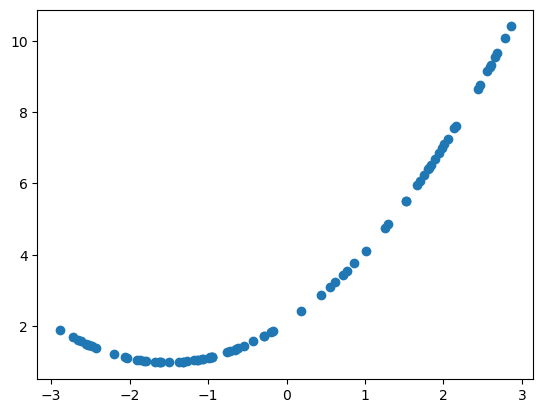

In [17]:
plt.scatter(x_train,regression_2.predict(x_train_poly))

In [19]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)

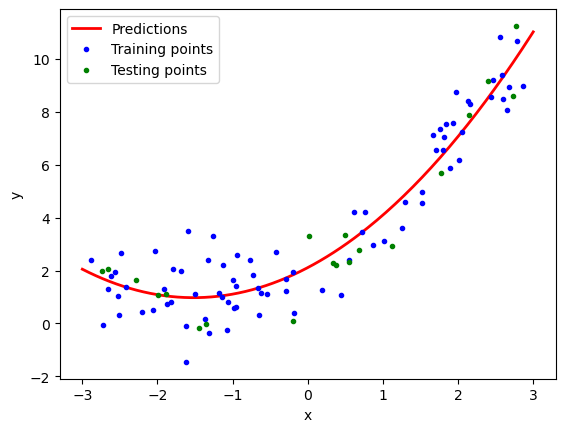

In [20]:
y_new = regression_2.predict(x_new_poly)
plt.plot(x_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(x_train,y_train,"b.",linewidth=2,label="Training points")
plt.plot(x_test,y_test,"g.",linewidth=2,label="Testing points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

##Pipeline concept

In [ ]:
from sklearn.pipeline import Pipeline

In [25]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train)
    y_pred_new = poly_regression.predict(X_new)
    #ploting prediction line
    plt.plot(X_new,y_pred_new,"r",linewidth=2,label="Predictions")
    plt.plot(x_train,y_train,"b.",linewidth=2,label="Training points")
    plt.plot(x_test,y_test,"g.",linewidth=2,label="Testing points")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.axis([-4,4,0,10])
    plt.show()

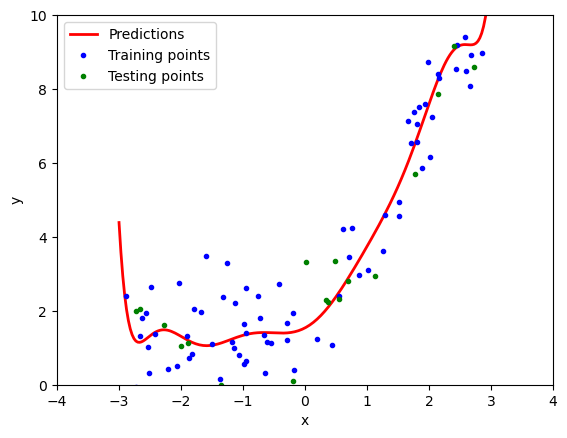

In [27]:
poly_regression(10)